In [126]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import seaborn as sms
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from datetime import datetime
import seaborn as sns
sns.set()

In [127]:
os.getcwd()

'c:\\Users\\gunja\\Documents\\DS and ML\\ML\\GoldPricePrediction'

In [128]:
df = pd.read_csv('archive/gld_price_data.csv')
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [129]:
### data collection and processing

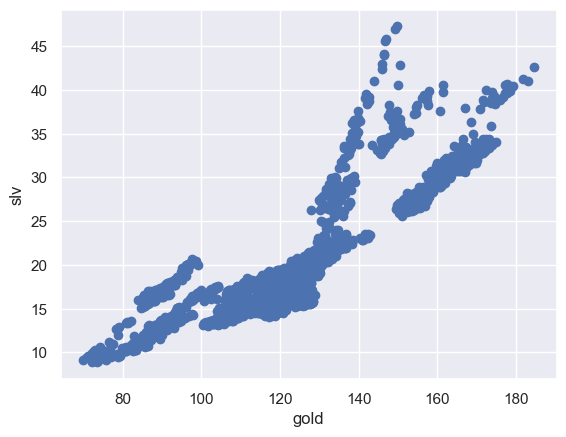

In [130]:
plt.scatter(df['GLD'],df['SLV'])
plt.xlabel('gold')
plt.ylabel('slv')
plt.show()

In [131]:
df.shape

(2290, 6)

In [132]:
df.size

13740

In [133]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [135]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [136]:
### getting correlations 

In [137]:
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y'))

In [138]:
correlation = df.corr()
correlation

,Date,SPX,GLD,USO,SLV,EUR/USD
Date,1.000000,0.944033,0.209118,-0.782230,-0.174108,-0.794540
SPX,0.944033,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.209118,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.782230,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.174108,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.794540,-0.672017,-0.024375,0.829317,0.321631,1.000000


In [139]:
X = df.drop(['GLD','Date'],axis =1)
y = df['GLD']


In [140]:
X_train,x_test,Y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 45)

In [141]:
## regression check

In [142]:
regressor = RandomForestRegressor(n_estimators = 100)

In [143]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [144]:
test_predection  = regressor.predict(x_test)

In [145]:
test_predection

array([117.08520101,  86.67269839, 127.70409988, 153.33530163,
       125.30210102, 124.44750067, 153.48830195, 120.72500102,
       140.79170062, 127.91490257, 106.45320093, 114.33000033,
       120.45880102, 106.66689897, 139.55140398,  94.56040082,
       164.52990052, 155.5855038 , 167.24569898, 150.24610159,
        88.27439941, 116.59040009, 126.88340087, 114.50430043,
       176.39329998, 127.82510096, 150.35550177, 124.98640018,
       123.20689967, 126.82669977, 160.29990005, 108.58269916,
       118.03679924, 134.87340052, 115.06560167, 115.10360096,
       112.89959982, 119.55820021, 109.7659007 , 153.5489016 ,
       132.89270101, 130.87910361, 117.64740057, 107.78029863,
       139.51230143, 118.07520073, 160.81120428, 167.81160123,
       122.39179968, 122.98749975, 114.31370026, 106.98839894,
       104.39840161, 123.96209899, 124.16190017, 124.93970044,
       115.55679946, 156.40159839, 110.02249993,  88.93010019,
       105.40120048, 118.39510111, 112.25750003, 161.84

In [146]:
#### error prediction 

In [147]:
error = metrics.r2_score(y_test,test_predection)

In [148]:
error * 100

98.97254907860857

In [149]:
from tensorflow.keras.layers import Dense,Dropout
import tensorflow as tf

In [150]:
from tensorflow.keras.models import Sequential
model = Sequential()

In [151]:
X_train.shape

(1832, 4)

In [152]:
model.add(Dense(128,activation='ReLU',input_shape=(4,)))
model.add(Dense(64,activation='ReLU'))
model.add(Dense(32,activation='ReLU'))
model.add(Dense(1,activation='ReLU'))

In [153]:
# model.compile(optimizer='SGD',loss='mean_squared_error',metrics='accuracy')

In [157]:
from keras.optimizers import Adam

model.compile(loss='mean_squared_error', optimizer=Adam(), metrics=['mean_squared_error','accuracy'])


In [158]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 128)               640       
                                                                 
 dense_40 (Dense)            (None, 64)                8256      
                                                                 
 dense_41 (Dense)            (None, 32)                2080      
                                                                 
 dense_42 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11,009
Trainable params: 11,009
Non-trainable params: 0
_________________________________________________________________


In [159]:
model.fit(X_train,Y_train,validation_data=(x_test,y_test),epochs=100)

Epoch 1/100
58/58 [==============================] - 1s 6ms/step - loss: 15613.7744 - mean_squared_error: 15613.7744 - accuracy: 0.0000e+00 - val_loss: 15571.0908 - val_mean_squared_error: 15571.0908 - val_accuracy: 0.0000e+00
Epoch 2/100
58/58 [==============================] - 0s 4ms/step - loss: 15613.7686 - mean_squared_error: 15613.7686 - accuracy: 0.0000e+00 - val_loss: 15571.0908 - val_mean_squared_error: 15571.0908 - val_accuracy: 0.0000e+00
Epoch 3/100
58/58 [==============================] - 0s 4ms/step - loss: 15613.7725 - mean_squared_error: 15613.7725 - accuracy: 0.0000e+00 - val_loss: 15571.0908 - val_mean_squared_error: 15571.0908 - val_accuracy: 0.0000e+00
Epoch 4/100
58/58 [==============================] - 0s 4ms/step - loss: 15613.7744 - mean_squared_error: 15613.7744 - accuracy: 0.0000e+00 - val_loss: 15571.0908 - val_mean_squared_error: 15571.0908 - val_accuracy: 0.0000e+00
Epoch 5/100
58/58 [==============================] - 0s 3ms/step - loss: 15613.7705 - mean_s

In [ ]:
model.predict([])